Disc radius: 9.308422677303092
94 94
[0.         0.20617999 0.28999498 0.35321481 0.40558726 0.45090804
 0.49113318 0.52742986 0.5605617  0.59106116 0.61931727 0.64562464
 0.67021279 0.69326467 0.7149289  0.73532814 0.75456499 0.77272627
 0.78988617 0.80610864 0.82144923 0.83595648 0.84967309 0.86263676
 0.87488097 0.88643554 0.8973271  0.90757952 0.91721424 0.92625054
 0.93470576 0.94259555 0.94993399 0.95673378 0.96300632 0.96876185
 0.97400954 0.97875756 0.98301315 0.98678268 0.99007169 0.99288498
 0.99522656 0.99709977 0.99850723 0.99945093 0.99993216 0.9999516
 0.99950928 0.99860458 0.99723624 0.99540236 0.99310034 0.99032693
 0.98707816 0.98334931 0.97913489 0.97442862 0.96922331 0.96351089
 0.95728228 0.95052733 0.94323472 0.93539189 0.92698488 0.91799817
 0.90841456 0.89821496 0.88737812 0.87588038 0.86369536 0.85079352
 0.83714172 0.82270264 0.80743402 0.79128786 0.77420926 0.75613503
 0.73699192 0.7166943  0.69514103 0.67221135 0.64775911 0.62160464
 0.59352296 0.56322589 0.5

/tmp/ipykernel_29420/2079859030.py:8: RuntimeWarning: invalid value encountered in sqrt
  y=np.sqrt(r**2-(x-r)**2)


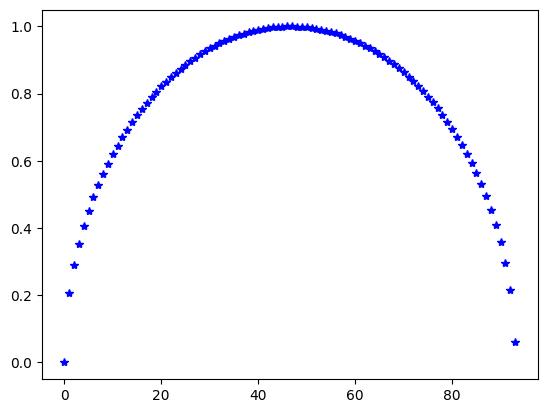

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt



def circ (r,x):
    y=np.sqrt(r**2-(x-r)**2)
    return y
size_d=10 # size in diameter
size=size_d/2
theta=(size/(1000*3600))*np.pi/180
l=3.84e8
r=(l*mt.tan(theta))
print('Disc radius:',r)
#r=74
x=np.arange(0,(2*r)+1,0.2)
y=circ(r,x)
disc_intensity=(y)/(r)

n = 2
b=[]
non_l=np.count_nonzero(~np.isnan(disc_intensity))
print(len(disc_intensity)-5,non_l)
disc_intensity=disc_intensity[:non_l]
print(disc_intensity)
plt.plot(disc_intensity,'b*')
#plt.plot(x,((y/100)-1)*2)
plt.show()

Plot for single frequency

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve1d
%matplotlib qt
#%matplotlib qt
import scienceplots
import seaborn as sns
#sns.set()
#sns.set_style('ticks')
#sns.set_context('notebook',font_scale=0.3)
#plt.style.use('science')
#plt.style.use(['science'])


def Function (d,lmb,x):
    f1= np.cos((np.pi*x**2)/(d*lmb))
    f2=np.sin((np.pi*x**2)/(d*lmb))
    return f1,f2


a=-100
func=[]
B=100
H=0.2
n=int((B-a)/H)

B_=[]
for j in range(n):
    a=-100
    b=a+(j+1)*H
    h=0.1
    steps=int((b-a)/h)
    #print(a,b,steps)
    af1,af2= Function(3.84e8 ,500e-9,a)
    bf1,bf2= Function(3.84e8 ,500e-9,b)
    cf1=[]
    cf2=[]
    B_.append(b)
    for i in range(1,steps-2):
        f1,f2= Function(3.84e8 ,500e-9,a+i*h)
        cf1.append(2*f1)
        cf2.append(2*f2)

    trp_meth_f1=(h/2)*(af1+bf1+np.sum(cf1))
    trp_meth_f2=(h/2)*(af2+bf2+np.sum(cf2))
    #print(pow(pow(abs(trp_meth_f1),2)+pow(abs(trp_meth_f2),2),2))
    func.append(pow(pow(abs(trp_meth_f1),2)+pow(abs(trp_meth_f2),2),2))
func=np.array(func)/(4000*9)
print(len(func))

convolved_intensity = convolve1d(func, disc_intensity)/(7*size_d)#320
print(max(convolved_intensity))
print(convolved_intensity)
plt.plot(B_,func,color="red", marker="o", linestyle="-",markersize=1,label='Point source 500 nm')
plt.plot(B_,convolved_intensity,color="blue", marker="o", linestyle="-",markersize=1,label='Convolved with 10 milliarcsecond object')
plt.grid(True)
plt.legend(loc='best',fontsize=4,frameon=True)
plt.xlabel('Distance along ground (in meters) ')
plt.ylabel('Normalized intensity')
plt.title('Simulated diffraction pattern')
plt.savefig('Single_Wavlength_Convolved_plot.jpg',dpi=800)
plt.show()

arr_2d = np.repeat(func, 1000).reshape(1000, -1)
#plt.imshow(arr_2d,'gray')
#plt.show()



1000
1.2610439958789161
[1.25200948e-06 1.25824045e-06 1.26686081e-06 1.27306621e-06
 1.27637500e-06 1.27680236e-06 1.27418531e-06 1.26823661e-06
 1.26347984e-06 1.26284338e-06 1.26694888e-06 1.27571120e-06
 1.28865128e-06 1.29919262e-06 1.30623472e-06 1.31011374e-06
 1.31089032e-06 1.30793430e-06 1.30336433e-06 1.30116295e-06
 1.30433896e-06 1.31307695e-06 1.32924995e-06 1.34519452e-06
 1.35704357e-06 1.36454864e-06 1.36844883e-06 1.36830290e-06
 1.36426338e-06 1.35936913e-06 1.35786902e-06 1.36159073e-06
 1.37560395e-06 1.39560695e-06 1.41384706e-06 1.42703727e-06
 1.43582525e-06 1.43905183e-06 1.43735486e-06 1.43278410e-06
 1.42822232e-06 1.42677999e-06 1.43387560e-06 1.45184600e-06
 1.47432339e-06 1.49623955e-06 1.51583745e-06 1.52989630e-06
 1.53719356e-06 1.53904143e-06 1.53520710e-06 1.52912266e-06
 1.52512446e-06 1.52854452e-06 1.54121486e-06 1.56190830e-06
 1.58539371e-06 1.60870308e-06 1.62535721e-06 1.63398321e-06
 1.63485626e-06 1.63299158e-06 1.63229130e-06 1.63340254e-06


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve1d
%matplotlib qt
#%matplotlib qt
import scienceplots
import seaborn as sns
#sns.set()
#sns.set_style('ticks')
#sns.set_context('notebook',font_scale=0.3)
#plt.style.use('science')
#plt.style.use(['science'])


def Function (d,lmb,x):
    f1= np.cos((np.pi*x**2)/(d*lmb))
    f2=np.sin((np.pi*x**2)/(d*lmb))
    return f1,f2


a=-100
func=[]
B=100
H=0.2
n=int((B-a)/H)

B_=[]
for j in range(n):
    a=-100
    b=a+(j+1)*H
    h=0.1
    steps=int((b-a)/h)
    #print(a,b,steps)
    af1,af2= Function(3.84e8 ,500e-9,a)
    bf1,bf2= Function(3.84e8 ,500e-9,b)
    cf1=[]
    cf2=[]
    B_.append(b)
    for i in range(1,steps-2):
        f1,f2= Function(3.84e8 ,500e-9,a+i*h)
        cf1.append(2*f1)
        cf2.append(2*f2)

    trp_meth_f1=(h/2)*(af1+bf1+np.sum(cf1))
    trp_meth_f2=(h/2)*(af2+bf2+np.sum(cf2))
    #print(pow(pow(abs(trp_meth_f1),2)+pow(abs(trp_meth_f2),2),2))
    func.append(pow(pow(abs(trp_meth_f1),2)+pow(abs(trp_meth_f2),2),2))
func=np.array(func)/(4000*9)
print(len(func))

convolved_intensity = convolve1d(func, disc_intensity)/(7*size_d)#320
print(max(convolved_intensity))
print(convolved_intensity)
plt.plot(B_,func,color="red", marker="o", linestyle="-",markersize=1,label='Point source 500 nm')
plt.plot(B_,convolved_intensity,color="blue", marker="o", linestyle="-",markersize=1,label='Convolved with 10 milliarcsecond object')
plt.grid(True)
plt.legend(loc='best',fontsize=4,frameon=True)
plt.xlabel('Distance along ground (in meters) ')
plt.ylabel('Normalized intensity')
plt.title('Simulated diffraction pattern')
plt.savefig('Single_Wavlength_Convolved_plot.jpg',dpi=800)
plt.show()

arr_2d = np.repeat(func, 1000).reshape(1000, -1)
#plt.imshow(arr_2d,'gray')
#plt.show()



1000
1.2610439958789161
[1.25200948e-06 1.25824045e-06 1.26686081e-06 1.27306621e-06
 1.27637500e-06 1.27680236e-06 1.27418531e-06 1.26823661e-06
 1.26347984e-06 1.26284338e-06 1.26694888e-06 1.27571120e-06
 1.28865128e-06 1.29919262e-06 1.30623472e-06 1.31011374e-06
 1.31089032e-06 1.30793430e-06 1.30336433e-06 1.30116295e-06
 1.30433896e-06 1.31307695e-06 1.32924995e-06 1.34519452e-06
 1.35704357e-06 1.36454864e-06 1.36844883e-06 1.36830290e-06
 1.36426338e-06 1.35936913e-06 1.35786902e-06 1.36159073e-06
 1.37560395e-06 1.39560695e-06 1.41384706e-06 1.42703727e-06
 1.43582525e-06 1.43905183e-06 1.43735486e-06 1.43278410e-06
 1.42822232e-06 1.42677999e-06 1.43387560e-06 1.45184600e-06
 1.47432339e-06 1.49623955e-06 1.51583745e-06 1.52989630e-06
 1.53719356e-06 1.53904143e-06 1.53520710e-06 1.52912266e-06
 1.52512446e-06 1.52854452e-06 1.54121486e-06 1.56190830e-06
 1.58539371e-06 1.60870308e-06 1.62535721e-06 1.63398321e-06
 1.63485626e-06 1.63299158e-06 1.63229130e-06 1.63340254e-06


### Plot for X-ray

In [7]:
%reset
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve1d
#%matplotlib inline
#%matplotlib notebook
%matplotlib qt
import scienceplots
import seaborn as sns
sns.set()
sns.set_style('ticks')
sns.set_context('notebook',font_scale=0.3)
plt.style.use('science')
plt.style.use(['science'])
import math as mt



def circ (r,x):
    y=np.sqrt(r**2-(x-r)**2)
    return y
size_d=0.1 # size in diameter
size=size_d/2
theta=(size/(1000*3600))*np.pi/180
l=1.5e9 #3.84e8
r=(l*mt.tan(theta))
print('Disc radius:',r)
#r=74
x=np.arange(0,(2*r)+1,0.01)
y=circ(r,x)
disc_intensity=((y)/(r))
non_l=np.count_nonzero(~np.isnan(disc_intensity))
print(len(disc_intensity),non_l)
disc_intensity=disc_intensity[:non_l]
print(disc_intensity)

def Simulate(d,lmb):
    def Function (d,lmb,x):
        f1= np.cos((np.pi*x**2)/(d*lmb))
        f2=np.sin((np.pi*x**2)/(d*lmb))
        return f1,f2

    a=-100    
    B=100
    H=0.02
    n=int((B-a)/H)
    print('Steps',n)
    func=[]
    B_=[]
    for j in range(n):
        a=-100
        b=a+(j+1)*H
        h=0.01
        steps=int((b-a)/h)
        #print(a,b,steps)
        af1,af2= Function(d ,lmb,a)
        bf1,bf2= Function(d ,lmb,b)
        cf1=[]
        cf2=[]
        B_.append(b)
        for i in range(1,steps-2):
            f1,f2= Function(d ,lmb,a+i*h)
            cf1.append(2*f1)
            cf2.append(2*f2)
        trp_meth_f1=(h/2)*(af1+bf1+np.sum(cf1))
        trp_meth_f2=(h/2)*(af2+bf2+np.sum(cf2))
        #print(pow(pow(abs(trp_meth_f1),2)+pow(abs(trp_meth_f2),2),2))
        func.append(pow(pow(abs(trp_meth_f1),2)+pow(abs(trp_meth_f2),2),2))
    return np.array(func),np.array(B_)
func1,B1_=Simulate(1.5e9 ,0.413e-9)#/(4000*9)
func,B_=Simulate(1.5e9 ,1.24e-9)
func1=func1/3.5
func=func/3.5
c_f=(func1+func)/2

print(len(func),len(B_))
convolved_intensity = convolve1d(func, disc_intensity)/(7*80*size_d)#320
convolved_band = convolve1d(c_f, disc_intensity)/(7*80*size_d)#320
plt.plot(B_[4500:5500],func[4500:5500],color="red", marker="o", linestyle="-",markersize=1,label='Point source 1.24 nm(1 kev)')
plt.plot(B_[4500:5500],c_f[4500:5500],color="black", marker="o", linestyle="-",markersize=1,label='Point source 1.24 nm(1 kev)')
plt.plot(B_[4500:5500],convolved_intensity[4500:5500],color="blue", marker="o", linestyle="-",markersize=1,label=f'Convolved {size_d} milliarcsecond object ')
plt.plot(B_[4500:5500],convolved_band[4500:5500],color="yellow", marker="o", linestyle="-",markersize=1,label=f'Convolved {size_d} milliarcsecond object ')
plt.grid(True)
plt.legend(loc='best',fontsize=4,frameon=True)
plt.xlabel('Distance along ground (in meters) ')
plt.ylabel('Normalized intensity')
plt.title('Simulated diffraction pattern')
plt.savefig('Convolved_plot.jpg',dpi=800)
plt.show()


Disc radius: 0.363610260832152
173 73
[0.         0.23291112 0.32708174 0.39774944 0.45597594 0.50607389
 0.55026792 0.58988649 0.6257992  0.65861255 0.68876965 0.71660592
 0.74238248 0.7663072  0.78854866 0.80924566 0.82851396 0.84645112
 0.86314013 0.87865213 0.89304845 0.90638225 0.91869979 0.93004146
 0.94044256 0.94993399 0.95854278 0.9662925  0.97320369 0.9792941
 0.98457896 0.98907118 0.99278153 0.99571873 0.99788963 0.99929922
 0.99995071 0.99984558 0.9989836  0.99736281 0.9949795  0.99182816
 0.98790146 0.98319009 0.97768272 0.97136581 0.96422345 0.95623714
 0.94738553 0.93764413 0.92698488 0.91537571 0.90277999 0.88915578
 0.87445502 0.85862241 0.84159408 0.82329583 0.80364092 0.78252714
 0.75983288 0.73541183 0.70908561 0.68063318 0.6497753  0.61615065
 0.57927766 0.53848942 0.49281477 0.44073713 0.37963051 0.30409984
 0.19829621]
Steps 10000


/tmp/ipykernel_1638046/3085519118.py:20: RuntimeWarning: invalid value encountered in sqrt
  y=np.sqrt(r**2-(x-r)**2)


Steps 10000
10000 10000


In [132]:
from scipy.integrate import cumtrapz
from scipy.signal import convolve
import scienceplots
import seaborn as sns
sns.set()
sns.set_style('ticks')
sns.set_context('notebook',font_scale=0.3)
plt.style.use('science')
plt.style.use(['science'])

# Adjusting the range and scaling for a more visible diffraction pattern
wavelength =1.23e-9 #500e-9  # Wavelength of light in meters (500 nm)
distance = 1.0  # Set a shorter distance for better visualization in meters (instead of the distance to the Moon)
distance_to_moon = 1.5e9 #3.84e8
I0 = 1  # Incident intensity (arbitrary unit)
characteristic_length = 14  # Characteristic length scale in meters

# Step size and grid range for x (observation screen positions)
dx = 0.1  # Step size for numerical integration in meters
# Adjust the x range for a closer observation window and a smaller characteristic length scale
x = np.arange(-100, 200, dx)  # Observation screen positions closer to the edge in meters


# Recalculate numerical integrations for the Fresnel integrals in this adjusted setup
cos_integral = cumtrapz(np.cos(np.pi * x**2 / (distance_to_moon * wavelength)), x, initial=0)
sin_integral = cumtrapz(np.sin(np.pi * x**2 / (distance_to_moon * wavelength)), x, initial=0)

# Calculate intensity using the adjusted setup
intensity = I0 * ((cos_integral ** 2) + (sin_integral ** 2))**2

# Tabulate values every 0.2 meters (note: adjusted dx and range may affect exact tabulation)
x_tabulated = x[::2]
intensity_tabulated = intensity[::2]

convolved_intensity = convolve(intensity, disc_intensity, mode='same')
# Plotting the intensity distribution for the closer range
plt.figure(figsize=(10, 6))
plt.plot(x_tabulated, intensity_tabulated, color="blue", marker="o", linestyle="-",markersize=1)
plt.title("Single Edge Diffraction Pattern (Adjusted for Closer Range)")
plt.xlabel("Position on screen (m)")
plt.ylabel("Intensity (arbitrary units)")
plt.grid(True)
plt.show()


#### Energy of photon to wavelength

In [5]:
import numpy as np
import scipy.constants as const
eng_ev=np.array([1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]) #0.1 to 100 kev
jul=eng_ev/6.242e18
lamb=const.c*const.h/jul
print(lamb/10**-9)
print(10e3)



[1.2399395  0.61996975 0.41331317 0.30998488 0.2479879  0.20665658
 0.17713421 0.15499244 0.13777106 0.12399395]
10000.0
